https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification/data


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
from google.colab import files
uploaded = files.upload()

Saving predictive_maintenance.csv to predictive_maintenance.csv


In [5]:
org_dataset = pd.read_csv('predictive_maintenance.csv')
dataset = org_dataset.copy()

Target and Faliure Type, Both the same, only that Faliure Type givs a detail of what type of Faliure was

In [6]:
#productID: consisting of a letter L, M, or H for low (50% of all products), medium (30%), and high (20%) as product quality variants and a variant-specific serial number
dataset.head(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,No Failure
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,No Failure
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,No Failure
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,No Failure
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,No Failure


First and second column will not be used so drop them.

Let's see how some of this data compares to each other.

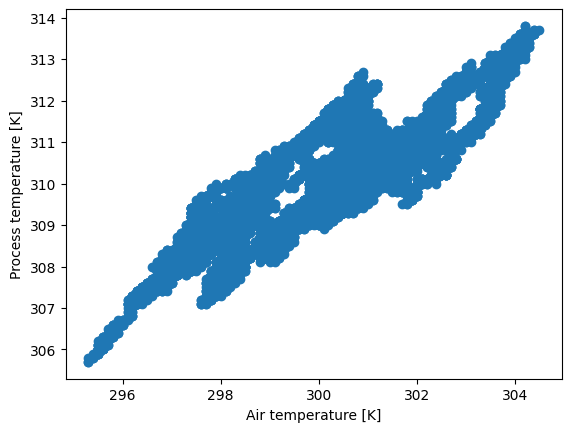

In [106]:
plt.scatter(dataset['Air temperature [K]'], dataset['Process temperature [K]'])
plt.xlabel('Air temperature [K]')
plt.ylabel('Process temperature [K]')
plt.show()

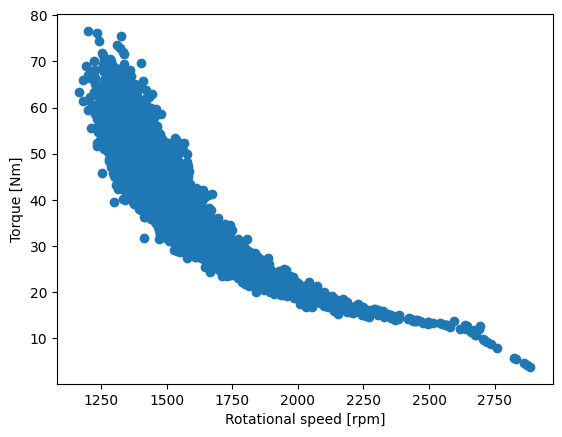

In [8]:
plt.scatter(dataset['Rotational speed [rpm]'], dataset['Torque [Nm]'])
plt.xlabel('Rotational speed [rpm]')
plt.ylabel('Torque [Nm]')
plt.show()

In [9]:
dataset.drop(dataset.columns[:2], axis=1, inplace= True)

We will not be looking into what type of faliure it was so we drop the column.

In [10]:
dataset.drop('Failure Type',axis=1,inplace=True)

Use Pandas to encode categorical data to numerical data

In [11]:
dataset = pd.get_dummies(dataset, columns=['Type'], dtype=int)

Visualize new data

In [11]:
dataset.tail(50)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Type_H,Type_L,Type_M
9950,298.1,307.8,1413,54.1,113,0,0,1,0
9951,298.2,307.8,1355,59.4,115,0,0,1,0
9952,298.2,307.8,1429,46.9,117,0,0,1,0
9953,298.1,307.8,1565,35.3,119,0,0,1,0
9954,298.1,307.9,1446,42.8,121,0,0,0,1
9955,298.2,307.9,1462,38.8,124,0,0,0,1
9956,298.2,307.8,1578,34.5,127,0,0,0,1
9957,298.1,307.8,1606,33.0,130,0,0,1,0
9958,298.1,307.8,1525,35.9,132,0,0,0,1
9959,298.1,307.8,1379,49.1,135,0,0,1,0


Describe that data to take a look at its mean and std

In [12]:
dataset.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Type_H,Type_L,Type_M
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.100300,0.600000,0.299700
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.300415,0.489922,0.458149
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,1.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,1.000000,1.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000


Look for null or infinte values so that data can pass cleanly through model

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Air temperature [K]      10000 non-null  float64
 1   Process temperature [K]  10000 non-null  float64
 2   Rotational speed [rpm]   10000 non-null  int64  
 3   Torque [Nm]              10000 non-null  float64
 4   Tool wear [min]          10000 non-null  int64  
 5   Target                   10000 non-null  int64  
 6   Type_H                   10000 non-null  int64  
 7   Type_L                   10000 non-null  int64  
 8   Type_M                   10000 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 703.2 KB


Separate training and testing data

In [14]:
train_dataset = dataset.sample(frac=0.8, random_state=1)
test_dataset = dataset.drop(train_dataset.index)

View new data

In [15]:
train_dataset.head(10)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Type_H,Type_L,Type_M
9953,298.1,307.8,1565,35.3,119,0,0,1,0
3850,302.3,311.0,1421,41.3,182,0,0,0,1
4962,304.0,312.7,1456,51.2,160,0,0,0,1
3886,302.4,311.3,1392,50.5,51,0,0,1,0
5437,302.9,312.6,1394,46.4,82,0,0,0,1
8517,298.3,309.6,1469,54.8,191,0,0,0,1
2041,299.1,308.9,1680,27.2,110,0,0,1,0
1989,298.2,307.9,1785,23.4,181,0,0,1,0
1933,298.1,308.0,1638,35.1,38,0,0,1,0
9984,298.7,308.4,1432,42.8,197,0,1,0,0


Let's look at the shape of our data

In [16]:
print(dataset.shape , train_dataset.shape , test_dataset.shape)

(10000, 9) (8000, 9) (2000, 9)


Create training and testing features and labels

In [17]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Target')
test_labels = test_features.pop('Target')

Normalize our data

In [18]:
normalizer = keras.layers.Normalization(input_shape=(train_features.shape[1],), axis=-1)
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())



[[3.00017395e+02 3.10009003e+02 1.53905237e+03 3.99491615e+01
  1.08567375e+02 1.00249998e-01 6.00875020e-01 2.98875004e-01]]


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Create our model made up of a single hidden layer

In [24]:
Model = keras.Sequential([
    normalizer, #Input Layer
    layers.Dense(64, activation='relu'), #Hidden Layer
    layers.Dense(1) #Output Layer
])

Model.compile(
    loss='mean_absolute_error',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics=['accuracy']
)

In [25]:
Model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization (Normalization)        │ (None, 8)                   │              17 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 658 (2.57 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 17 (72.00 B)

Train our model

In [26]:
Model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=1,
    epochs=50
)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9360 - loss: 0.1930 - val_accuracy: 0.9600 - val_loss: 0.0553
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9682 - loss: 0.0438 - val_accuracy: 0.9606 - val_loss: 0.0660
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9684 - loss: 0.0481 - val_accuracy: 0.9600 - val_loss: 0.0612
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9685 - loss: 0.0453 - val_accuracy: 0.9600 - val_loss: 0.0855
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9654 - loss: 0.0469 - val_accuracy: 0.9600 - val_loss: 0.0587
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9651 - loss: 0.0445 - val_accuracy: 0.9600 - val_loss: 0.0439
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9653 - loss: 0.0457 - val_accuracy: 0.9600 - val_loss: 0.0500
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9631 - loss: 0.0478 - val_accuracy: 0.

Evalute and save our testing loss and accuracy.

In [27]:
test_loss, test_accuracy = Model.evaluate(test_features, test_labels, verbose=1)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9689 - loss: 0.0385


In [40]:
print(test_loss*100, test_accuracy*100)

3.5883963108062744 97.14999794960022


Make a prediction

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


<Axes: title={'center': 'predicted probabilities'}, ylabel='Frequency'>

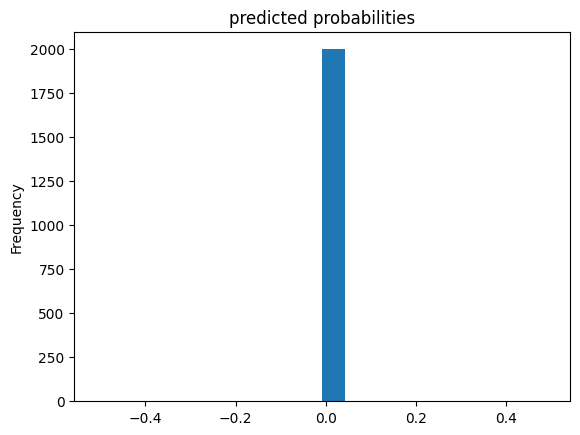

In [59]:
pred_dicts = list(Model.predict(test_features))
probs = pd.Series([pred[0] for pred in pred_dicts]) # Access the first element of the prediction output

probs.plot(kind='hist', bins=20, title='predicted probabilities')

Lets try and make a model that predicts the process tempeature

In [13]:
dataset2 = org_dataset.copy()
dataset2.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


Drop columns that will not be used

In [14]:
dataset2.drop(dataset2.columns[:2], axis=1, inplace= True)
dataset2.drop('Failure Type',axis=1,inplace=True)
dataset2.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0


Lets create our traing features and variables, in this model we will look to predict the process temperature using the air temperature

In [22]:
single_train_dataset = dataset2.sample(frac=0.8, random_state=1)
single_test_dataset = dataset2.drop(single_train_dataset.index)

In [23]:
single_train_features = single_train_dataset.copy()
single_test_features = single_test_dataset.copy()

single_train_labels = single_train_features.pop('Process temperature [K]')
single_test_labels = single_test_features.pop('Process temperature [K]')

In [84]:
feature = 'Air temperature [K]'

single_train_feature = np.array(single_train_features[feature])

single_normalizer = keras.layers.Normalization(input_shape=[1,], axis=None)
single_normalizer.adapt(single_train_feature)
print(single_normalizer.mean.numpy())

[300.0174]


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [71]:
print(single_train_feature.shape, single_train_labels.shape)

(8000,) (8000,)


Now we create a Linear Regression Model

In [85]:
SModel = tf.keras.Sequential([
    single_normalizer,
    layers.Dense(1)
])

SModel.compile(
    loss='mean_absolute_error',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics=['accuracy']
)

In [86]:
SModel.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_8 (Normalization)      │ (None, 1)                   │               3 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5 (24.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 3 (16.00 B)

Train the Model

In [87]:
history = SModel.fit(
    single_train_feature,
    single_train_labels,
    validation_split=0.2,
    verbose=1,
    epochs=50
)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 305.0406 - val_accuracy: 0.0000e+00 - val_loss: 290.0215
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: 285.0146 - val_accuracy: 0.0000e+00 - val_loss: 270.0224
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: 265.0062 - val_accuracy: 0.0000e+00 - val_loss: 250.0228
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: 245.0192 - val_accuracy: 0.0000e+00 - val_loss: 230.0224
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: 225.0023 - val_accuracy: 0.0000e+00 - val_loss: 210.0239
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 204.9837 - val_accuracy: 0.0000e+00 - val_loss: 190.0251
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 185.0224 - val_accuracy: 0.0000e+00 - val_loss: 170.0233
Epoch 8/50
200/200 ━

Get the Results

In [96]:
results = {}

results['Test Results: '] = SModel.evaluate(
    np.array(single_test_features[feature]),
    single_test_labels, verbose=0)

print(results)

{'Test Results: ': [0.5907256007194519, 0.0]}


Create a plot to visualize the training porcess of the model

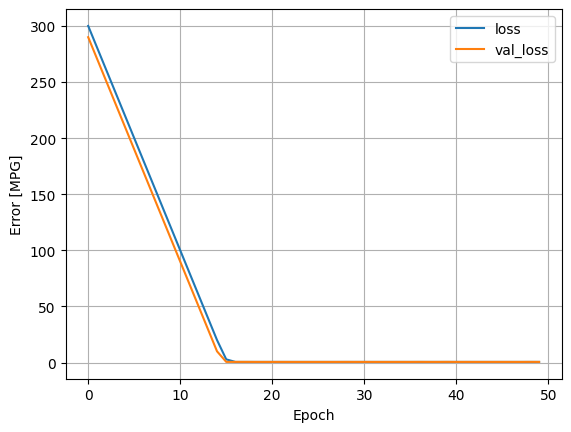

In [97]:
#Extracted from TesorFlow Website
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)
  plt.show()

plot_loss(history)

Visualize the prediction vs the data

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


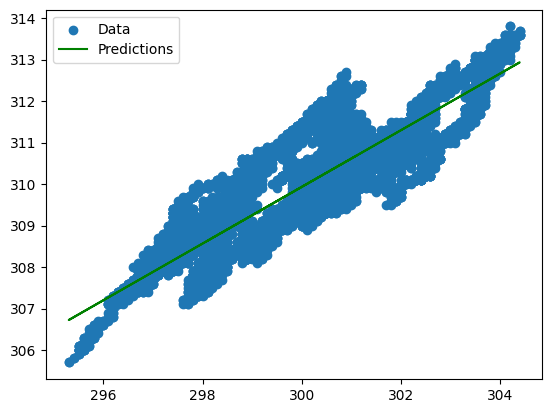

In [100]:
plt.scatter(single_train_feature, single_train_labels, label='Data')
plt.plot(single_train_feature, SModel.predict(single_train_feature), label='Predictions', color = 'g')
plt.legend()
plt.show()